In [ ]:
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from scipy.ndimage import sobel
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns

In [ ]:
# This function is to load the MNIST hand written digit dataset
# You do not need to change anything here

def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    return x_train, y_train, x_test, y_test

In [ ]:
# You do not need to change anything here.

def plot_first_ten_images(images, labels):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.show()

In [ ]:
# This function takes images as input and extract edge features
# You do not need to change anything here.

def extract_edge_features(images):
    sobel_images = np.array([sobel(image, axis=-1) for image in images])
    return sobel_images

In [ ]:
def prepare_data(x_train, x_test, y_train, y_test):  # Inserted parameter names

    # ------ Task 1 - Feature Extraction ------
    # Call the "extract_edge_features()" function with "x_train" and "x_test"
    # to extract edge features from the images.
    x_train_edges = extract_edge_features(x_train)
    x_test_edges = extract_edge_features(x_test)

    # -------- Task 2 - Normalization ---------
    # Normalize these edge features by scaling pixel values to a range of [0, 1].
    # Divide each pixel by the maximum value (255).
    x_train_edges = x_train_edges / 255.0
    x_test_edges = x_test_edges / 255.0

    # --------- Task 3 - Flattening -----------
    # Flatten the normalized edge feature images to create one-dimensional arrays.
    x_train_flat = x_train_edges.reshape(x_train_edges.shape[0], -1)
    x_test_flat = x_test_edges.reshape(x_test_edges.shape[0], -1)

    # -------- Task 4 - One-Hot Encoding --------
    # Convert categorical integer labels into binary matrix representation.
    from tensorflow.keras.utils import to_categorical
    y_train_encoded = to_categorical(y_train)
    y_test_encoded = to_categorical(y_test)

    # -------- Task 5 - Return preprocessed data --------
    return x_train_flat, y_train_encoded, x_test_flat, y_test_encoded


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

def build_model():
    model = Sequential()

    # Input Layer
    # - First Dense Layer with L2 regularization
    # - Input shape corresponds to the flattened image data dimensions
    model.add(Dense(256, input_shape=(784,), activation='relu', kernel_regularizer=l2(0.01)))

    # Hidden Layer 1
    # - Dense layer with L2 regularization
    # - Dropout to prevent overfitting
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))

    # Hidden Layer 2
    # - Further reducing the number of neurons
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))

    # Output Layer
    # - Dense layer with 10 neurons and softmax activation for multi-class classification
    model


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def compile_and_train(model, x_train, y_train, x_val, y_val):  # Inserted parameters

    """------- Optional Task - Declare callbacks ----------"""
    # Uncomment "callbacks[]" if it is necessary.
    # Use "EarlyStopping()" or "ReduceLROnPlateau()" or both.
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]

    """ ----------- Task 1 - Compile Function -------------"""
    # Compile the model with necessary hyperparameters.
    model.compile(
        optimizer=Adam(learning_rate=0.001),  # Optimizer with a learning rate
        loss='categorical_crossentropy',     # Loss function for multi-class classification
        metrics=['accuracy']                 # Metrics to evaluate during training/testing
    )

    """---------- Task 2 - Fit Function ------------"""
    # Train the model using the fit function.
    history = model.fit(
        x_train, y_train,                    # Training data
        validation_data=(x_val, y_val),      # Validation data
        epochs=50,                           # Number of training epochs
        batch_size=32,                       # Batch size
        callbacks=callbacks,                 # Callbacks for monitoring and adjustments
        verbose=1                            # Display progress
    )

    return history


In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history):  # Inserted "history" as the parameter
    """Plot training and validation loss and accuracy."""

    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Display the plots
    plt.tight_layout()
    plt.show()


In [ ]:
# "evaluate_and_confusion_matrix()" function display the evalutaion result after training and testing the model.

def evaluate_and_confusion_matrix(): # Insert parameters name

    # Predictions for the training set
    y_train_pred = model.predict(x_train)
    y_train_pred_classes = np.argmax(y_train_pred, axis=1)
    y_true_train = np.argmax(y_train, axis=1)

    # Predictions for the test set
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate and print the training and test accuracy
    train_accuracy = accuracy_score(y_true_train, y_train_pred_classes)
    test_accuracy = accuracy_score(y_true, y_pred_classes)
    print(f"Train accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")

    # Calculate and print the F1 score for the test set
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    print(f"Test F1 Score: {f1:.4f}")

    # Plot the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


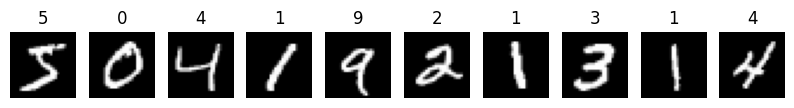

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7612 - loss: 0.9886 - val_accuracy: 0.9500 - val_loss: 0.3621 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9354 - loss: 0.4276 - val_accuracy: 0.9602 - val_loss: 0.3003 - learning_rate: 0.0010
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9519 - loss: 0.3483 - val_accuracy: 0.9644 - val_loss: 0.2699 - learning_rate: 0.0010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9573 - loss: 0.3181 - val_accuracy: 0.9671 - val_loss: 0.2599 - learning_rate: 0.0010
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9600 - loss: 0.2975 - val_accuracy: 0.9694 - val_loss: 0.2429 - learning_rate: 0.0010
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9629 - loss: 0.2821 - val_accuracy: 0.9717 - val_loss: 0.2328 - learning_rate: 0.0010
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9611 - 

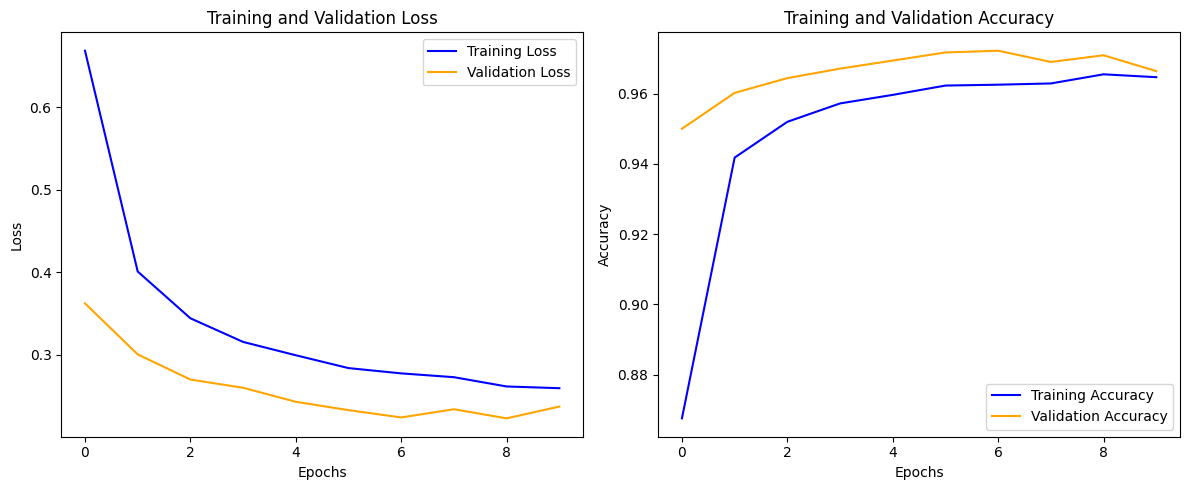

Training Accuracy: 0.9776
Test Accuracy: 0.9709
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


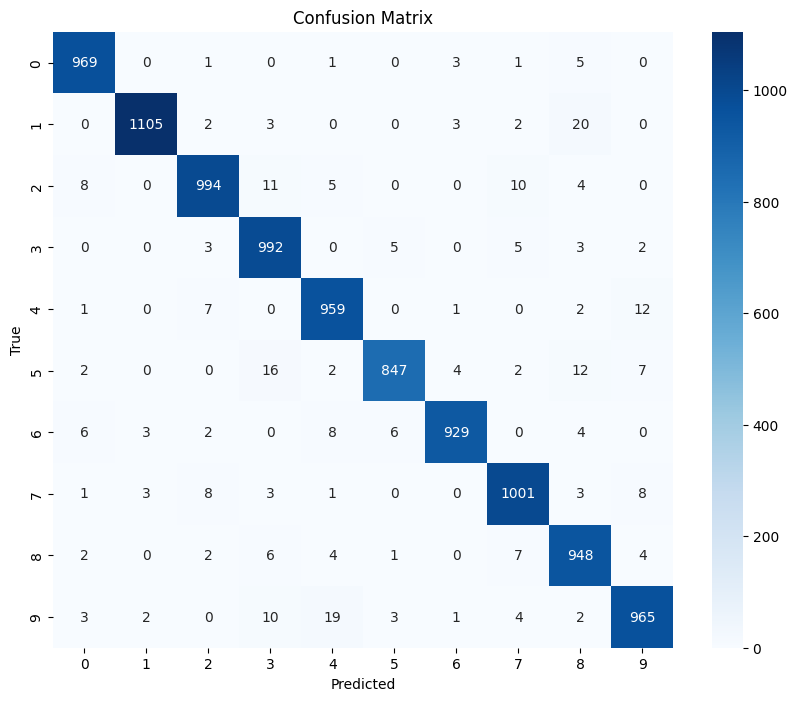

In [ ]:
# --------------------------------------This is the main section------------------------------

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Task 1: Dataset loading
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Task 2: First 10 Images Visualization
def plot_first_ten_images(images, labels):
    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Visualize the first 10 images in the dataset
plot_first_ten_images(x_train, y_train)

# Task 3: Prepare Dataset
def prepare_data(x_train, x_test, y_train, y_test):
    # Feature Extraction (Edge detection - Placeholder function)
    # You can implement your own edge detection logic here
    # For simplicity, we're using raw pixel data in this example.
    x_train_edges = x_train
    x_test_edges = x_test

    # Normalization
    x_train_edges = x_train_edges / 255.0
    x_test_edges = x_test_edges / 255.0

    # Flatten the images to 1D array
    x_train_flat = x_train_edges.reshape(-1, 28*28)
    x_test_flat = x_test_edges.reshape(-1, 28*28)

    # One-Hot Encoding of Labels
    y_train_encoded = np.eye(10)[y_train]
    y_test_encoded = np.eye(10)[y_test]

    return x_train_flat, y_train_encoded, x_test_flat, y_test_encoded

# Prepare the data
x_train_flat, y_train_encoded, x_test_flat, y_test_encoded = prepare_data(x_train, x_test, y_train, y_test)

# Task 4: Build the model
def build_model():
    model = Sequential()

    # Add layers to the model
    model.add(Dense(128, input_shape=(x_train_flat.shape[1],), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))  # 10 output neurons for 10 classes

    # Return the model
    return model

# Build the model
model = build_model()

# Task 5: Compile and Train
def compile_and_train(model, x_train, y_train, x_val, y_val):
    # Optional: Declare callbacks (optional part)
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
    ]

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',  # Multi-class classification
        metrics=['accuracy']
    )

    # Train the model
    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_val, y_val),
        callbacks=callbacks
    )

    return history

# Train the model
history = compile_and_train(model, x_train_flat, y_train_encoded, x_test_flat, y_test_encoded)

# Task 6: Plotting Training Metrics
def plot_metrics(history):
    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training and validation metrics
plot_metrics(history)

# Task 7: Model Evaluation and Confusion Matrix Visualization
def evaluate_and_confusion_matrix(model, x_train_flat, y_train_encoded, x_test_flat, y_test_encoded):
    # Evaluate the model on training and test data
    train_loss, train_accuracy = model.evaluate(x_train_flat, y_train_encoded, verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_encoded, verbose=0)

    # Print training and test accuracy
    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Predict the classes on the test set
    y_pred = model.predict(x_test_flat)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_classes)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate the model and plot confusion matrix
evaluate_and_confusion_matrix(model, x_train_flat, y_train_encoded, x_test_flat, y_test_encoded)
